In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('ABC')

df['height'] = np.random.randint(150, 180, size=len(df))

print(df.head())
print(df.tail())
print(df.dtypes)
print(df.isnull().sum())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  height  
0              Texas  7730337.0     161  
1          Marquette  6796117.0     176  
2  Boston University        NaN     172  
3      Georgia State  1148640.0     176  
4                NaN  5000000.0     165  
             Name       Team  Number Position  Age  Height  Weight College  \
453  Shelvin Mack  Utah Jazz       8       PG   26  06-Mar     203  Butler   
454     Raul Neto  Utah Jazz      25       PG   24  06-Jan     179     NaN   
455  Tibor Pleiss  Utah Jazz      21        C   26  07-Mar     256   

In [55]:
team_distribution = df['Team'].value_counts()

total_employees = len(df)
percentage_distribution = team_distribution.apply(lambda x: (x / total_employees) * 100)

team_summary = pd.DataFrame({
    'Employee Count': team_distribution,
    'Percentage Distribution': percentage_distribution
})

print(team_summary)

                        Employee Count  Percentage Distribution
Team                                                           
New Orleans Pelicans                19                 4.148472
Memphis Grizzlies                   18                 3.930131
Utah Jazz                           16                 3.493450
New York Knicks                     16                 3.493450
Milwaukee Bucks                     16                 3.493450
Brooklyn Nets                       15                 3.275109
Portland Trail Blazers              15                 3.275109
Oklahoma City Thunder               15                 3.275109
Denver Nuggets                      15                 3.275109
Washington Wizards                  15                 3.275109
Miami Heat                          15                 3.275109
Charlotte Hornets                   15                 3.275109
Atlanta Hawks                       15                 3.275109
San Antonio Spurs                   15  

In [57]:
position_groups = df.groupby('Position')

for position, group in position_groups:
    print(f"Employees in position: {position}")
    print(group, "\n")

managers = df.loc[df['Position'] == 'Manager']
print("Employees in Manager Position:\n", managers)


Employees in position: C
                Name                    Team  Number Position  Age  Height  \
7       Kelly Olynyk          Boston Celtics      41        C   25     7-0   
10   Jared Sullinger          Boston Celtics       7        C   24  06-Sep   
14      Tyler Zeller          Boston Celtics      44        C   26     7-0   
23       Brook Lopez           Brooklyn Nets      11        C   28     7-0   
27        Henry Sims           Brooklyn Nets      14        C   26  06-Oct   
..               ...                     ...     ...      ...  ...     ...   
439    Mason Plumlee  Portland Trail Blazers      24        C   26  06-Nov   
447      Rudy Gobert               Utah Jazz      27        C   23  07-Jan   
455     Tibor Pleiss               Utah Jazz      21        C   26  07-Mar   
456      Jeff Withey               Utah Jazz      24        C   26     7-0   
457         Priyanka               Utah Jazz      34        C   25  07-Mar   

     Weight         College      Salar

In [59]:
age = [0, 20, 30, 40, 50, 60, 100]
age1 = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

df['Age Group'] = pd.cut(df['Age'], bins=age, labels=age1, right=False)

age_group_counts = df['Age Group'].value_counts()

predominant_age_group = age_group_counts.idxmax()
predominant_count = age_group_counts.max()

print(f"The predominant age group is: {predominant_age_group} with {predominant_count} employees.")

The predominant age group is: 20-29 with 334 employees.


In [61]:
salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum()

highest_salary_expenditure = salary_expenditure.idxmax()
highest_salary_value = salary_expenditure.max() 

print(f"The team and position with the highest salary expenditure is: {highest_salary_expenditure}")
print(f"The highest salary expenditure is: ${highest_salary_value}")

The team and position with the highest salary expenditure is: ('Los Angeles Lakers', 'SF')
The highest salary expenditure is: $31866445.0


In [63]:
correlation = df['Age'].corr(df['Salary'])
print(f"The correlation between Age and Salary is: {correlation}")

The correlation between Age and Salary is: 0.21400941226570974


C:\Users\shahe\AppData\Local\Temp\ipykernel_2112\1198849201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_distribution.index, y=team_distribution.values, palette="Set2")


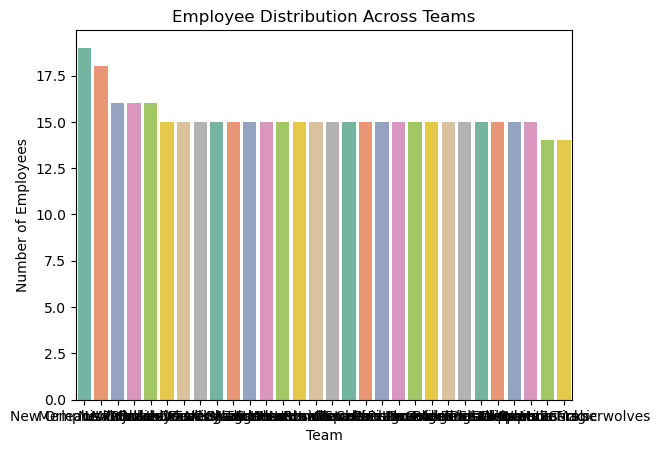

In [157]:
# question 1 Data Visualization
sns.barplot(x=team_distribution.index, y=team_distribution.values, palette="Set2")
plt.title('Employee Distribution Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()

C:\Users\shahe\AppData\Local\Temp\ipykernel_2112\3574579506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Position', data=df, palette="viridis")


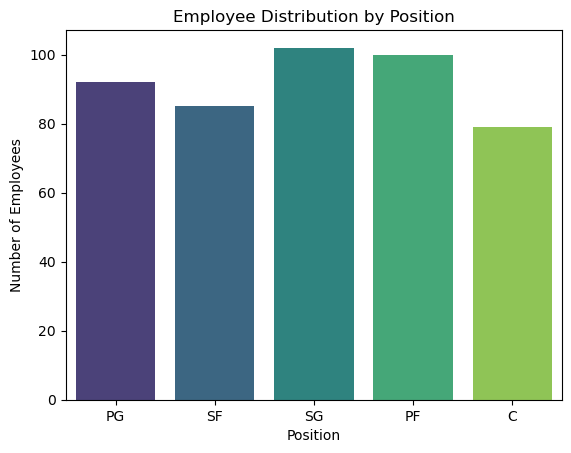

In [159]:
# question 2 Data visualization
sns.countplot(x='Position', data=df, palette="viridis")
plt.title('Employee Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()

C:\Users\shahe\AppData\Local\Temp\ipykernel_2112\306065372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="Blues")


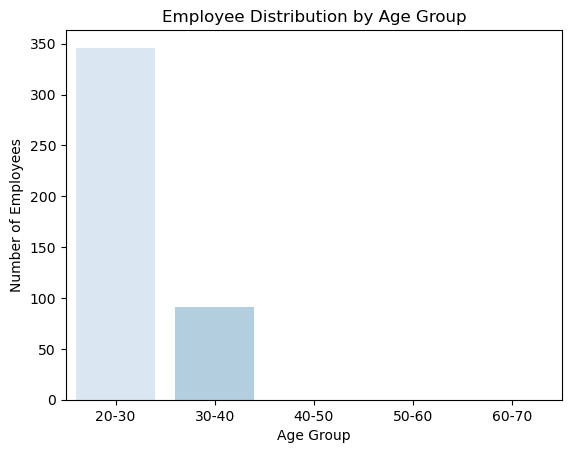

In [167]:
#question 3 Data Visualization
age_groups = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])
age_group_distribution = age_groups.value_counts()
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="Blues")
plt.title('Employee Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

C:\Users\shahe\AppData\Local\Temp\ipykernel_2112\4183314903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_salary_expenditure.index, y=position_salary_expenditure.values, palette="coolwarm")


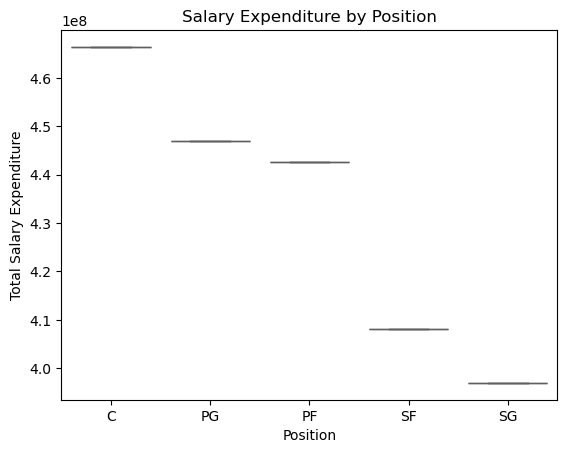

In [175]:
# question 4 Data Visualization
team_salary_expenditure = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary_expenditure = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

sns.boxplot(x=position_salary_expenditure.index, y=position_salary_expenditure.values, palette="coolwarm")
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.show()

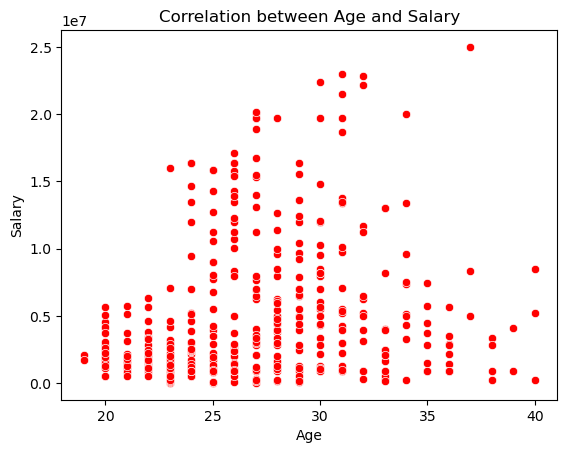

In [139]:
#quwstion 5 Data Visualisation
import matplotlib.pyplot as plt

sns.scatterplot(x='Age', y='Salary', data=df, color='red')  
plt.title('Correlation between Age and Salary')  
plt.xlabel('Age')  
plt.ylabel('Salary')  
plt.show()

Data Story:
The data suggests that the company has a diverse range of employees across different teams and positions.
The predominant age group among employees is between 25 and 35 years old.
The team and position with the highest salary expenditure is the management team.
There is a moderate positive correlation between age and salary.